# Email/SMS Spam Classifier

In [111]:
import numpy as np
import pandas as pd

In [112]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [113]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [114]:
df.shape

(5572, 5)

In [115]:
# 1. data cleaning
# 2. eda
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. Improvement
# 7. Deployment

## 1. Data cleaning

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [117]:
df = df.iloc[:,0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
# renaming col name
new_col_name = {'v1':'target','v2':'text'}
df.rename(columns=new_col_name,inplace=True)

In [119]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [121]:
df['target'] = encoder.fit_transform(df['target']) # ham = 0, spam = 1

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [124]:
# check for duplicates
df.duplicated().sum()

403

In [125]:
df = df.drop_duplicates(keep='first')

In [126]:
df.shape

(5169, 2)

## 2. EDA

In [127]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

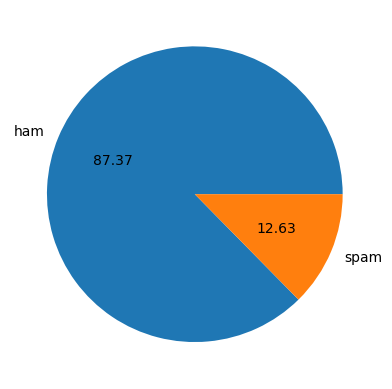

In [128]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [129]:
# data is imbalanced

In [130]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
df['num_char'] = df['text'].apply(len) #number of characters

In [132]:
def func(message):
    lis = nltk.word_tokenize(message)
    return len(lis)
df['num_words'] = df['text'].apply(func) #number of words

In [133]:
def func1(message):
    lis = nltk.sent_tokenize(message)
    return len(lis)
df['num_sentences'] = df['text'].apply(func1)

In [134]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [135]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [136]:
df[df['target']==1].describe() # analysing spam

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [137]:
df[df['target']==0].describe() # analysing ham

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

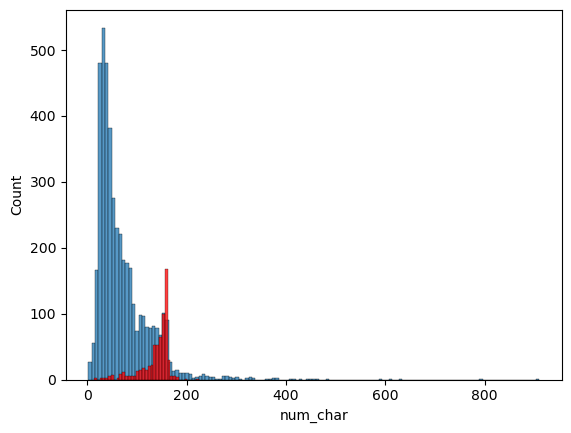

In [138]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

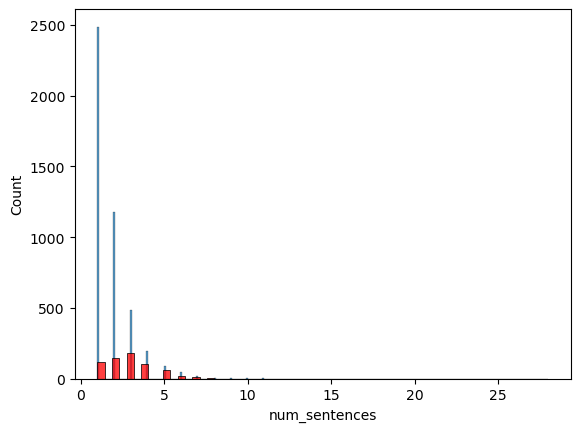

In [139]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

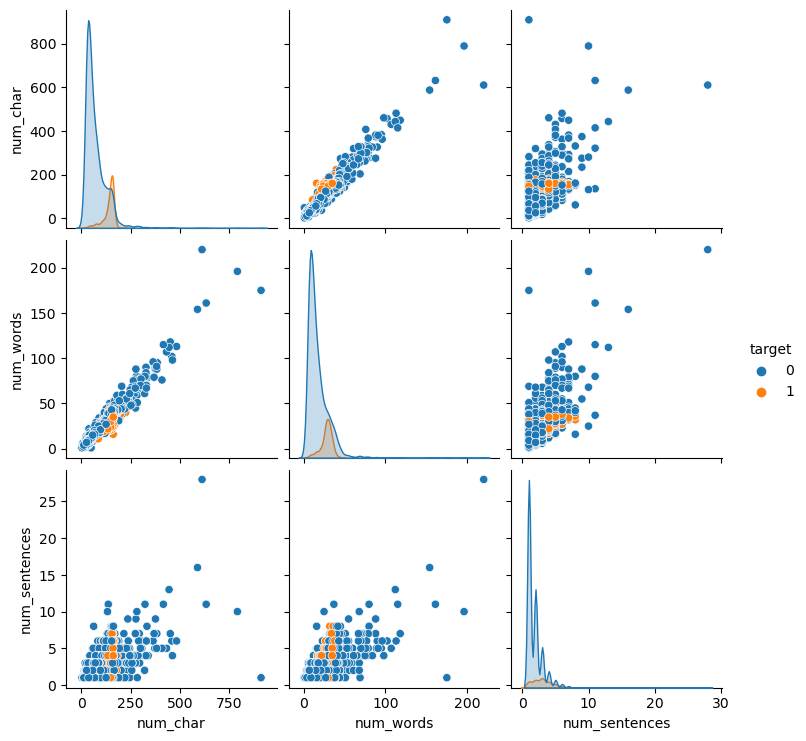

In [140]:
sns.pairplot(df,hue='target')

In [141]:
df.corr()

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

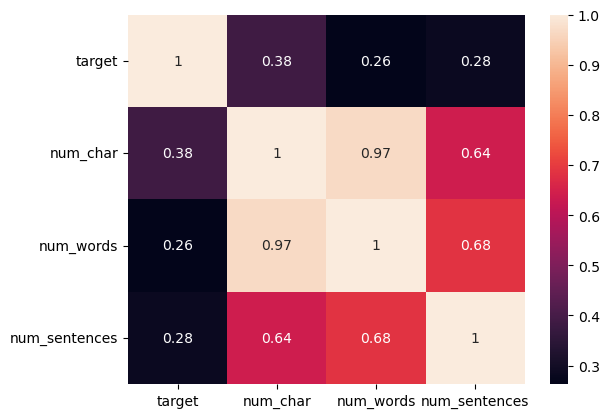

In [142]:
sns.heatmap(df.corr(),annot=True)

In [143]:
# num_char and num_words has high coorelation => multicollinearity

## 3. Data Preprocessing

In [144]:
# lowercase
# tokenization
# removing special characters
# removing stop words and punctuation
# stemming

In [145]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i);
    text = y[:] # cloning
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [146]:
df['transform_text'] = df['text'].apply(transform_text)

In [157]:
df.head()

,target,text,num_char,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [150]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [161]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

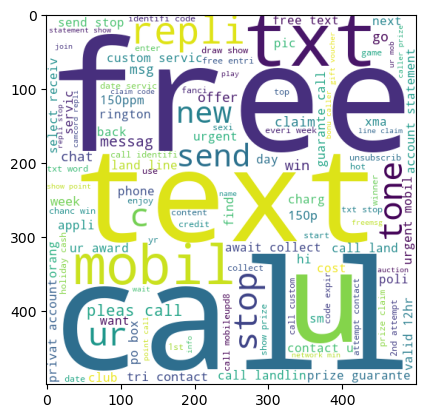

In [162]:
plt.imshow(spam_wc)

In [164]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

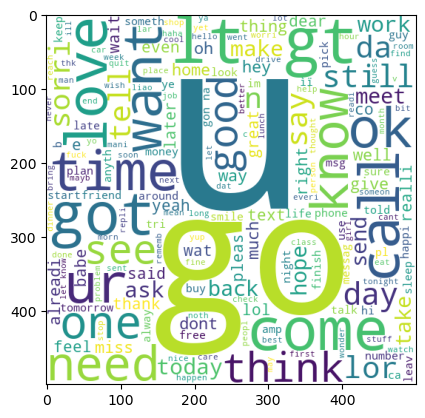

In [165]:
plt.imshow(ham_wc)

In [167]:
df[df['target']==1]['transform_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [168]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in  msg.split():
        spam_corpus.append(word)

In [169]:
len(spam_corpus)

9939

In [174]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


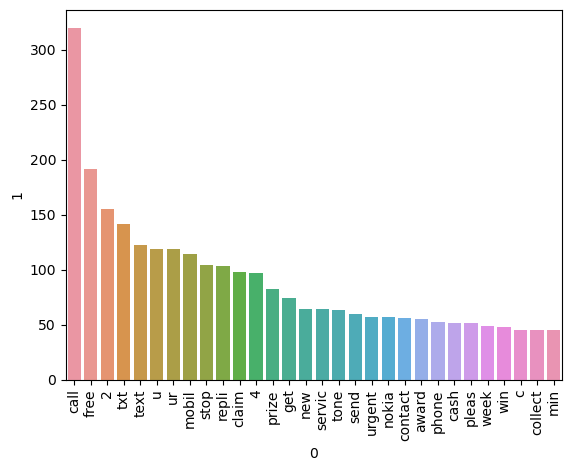

In [178]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [263]:
# bag of words

In [264]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [265]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [266]:
x = df['transform_text'].values

In [267]:
y = df['target'].values

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [270]:
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [271]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [272]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [273]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("ACCURACY SCORE")
print("Gaussian: ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print('\n')
print("Multinomial : ",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print('\n')
print("Bernoulli : ",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

ACCURACY SCORE
Gaussian:  0.8433268858800773
[[759 137]
 [ 25 113]]
0.452


Multinomial :  0.9690522243713733
[[896   0]
 [ 32 106]]
1.0


Bernoulli :  0.9816247582205029
[[896   0]
 [ 19 119]]
1.0


In [214]:
# here the dataset is imbalanced
# so precision score matters a lot
# so we will go with tfidf -> Bernoulli (bnb) 

In [275]:
import pickle # wb -> write binary , rg -> read binary
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))